In [1]:
##import package
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import skrf as rf

In [2]:
##List file .s2p
# folder path
dir_path = r'D:\itebe\FISIKA\Thesis, moga cepet lulus aamiin\Pengukuran\20230120\gabung'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

['a (01).s2p', 'a (02).s2p', 'a (03).s2p', 'a (04).s2p', 'a (05).s2p', 'a (06).s2p', 'a (07).s2p', 'a (08).s2p', 'a (09).s2p', 'a (10).s2p', 'a (11).s2p', 'a (12).s2p', 'a (13).s2p', 'a (14).s2p', 'a (15).s2p', 'a (16).s2p', 'a (17).s2p', 'a (18).s2p', 'a (19).s2p', 'a (20).s2p', 'a (21).s2p', 'a (22).s2p', 'a (23).s2p', 'a (24).s2p', 'a (25).s2p', 'a (26).s2p', 'a (27).s2p', 'a (28).s2p', 'a (29).s2p', 'a (30).s2p', 'a (31).s2p', 'a (32).s2p', 'a (33).s2p', 'a (34).s2p', 'a (35).s2p', 'a (36).s2p', 'a (37).s2p', 'a (38).s2p', 'a (39).s2p', 'a (40).s2p', 'a (41).s2p', 'a (42).s2p', 'a (43).s2p', 'a (44).s2p', 'a (45).s2p', 'a (46).s2p', 'a (47).s2p', 'a (48).s2p', 'a (49).s2p', 'a (50).s2p', 'a (51).s2p', 'b (30).s2p', 'b (31).s2p', 'b (32).s2p', 'b (33).s2p', 'b (34).s2p', 'b (35).s2p', 'b (36).s2p', 'b (37).s2p', 'b (38).s2p', 'b (39).s2p', 'b (40).s2p', 'b (41).s2p', 'b (42).s2p', 'b (43).s2p', 'b (44).s2p', 'b (45).s2p', 'b (46).s2p', 'b (47).s2p', 'b (48).s2p', 'b (49).s2p', 'b (5

In [3]:
##membuat file baru
read = rf.Network(res[0])
DF = pd.DataFrame(read.f)
DF.to_csv('frequency.csv', mode='w', index=False, header=True)

freq=pd.read_csv('frequency.csv')

In [4]:
#membuat file S21 dalam .csv
DF = pd.DataFrame(read.s_db[:,0][:,1])
DF.to_csv('S21.csv', mode='w', index=False, header=True)
new=pd.read_csv('S21.csv')
for i in range (len(res)-3):
    read=rf.Network(res[i])
    add=pd.DataFrame(read.s_db[:,0][:,1])
    new[str(i)]=add
new
a=[]
for i in range (len(res)-5):
    read=rf.Network(res[i])
    a.append(read.s_db[:,0,1].min())

#medan = pd.read_csv('Kalibrasi Magnet Kecil.csv')
#xlist=medan.iloc[1:24,1],medan.iloc[0:13,2],medan.iloc[0:42,3]
#xlist.append()
#xlist.append()
#xlist

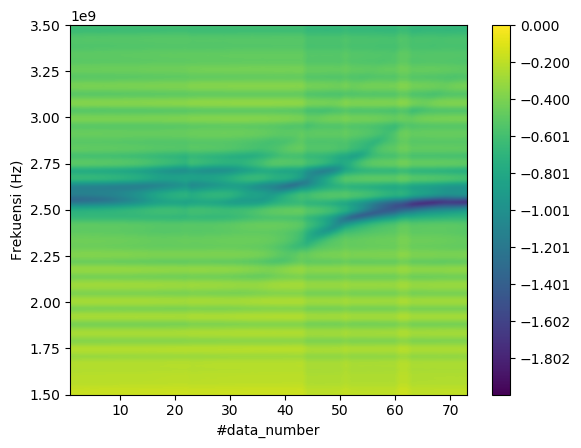

In [5]:
#membuat plot
#deklarasi x, y, z
absol = pd.read_csv('S21.csv')
xlist=[]

for i in range (len(res)-3, 0, -1):
    xlist.append(i)
#formula 2 magnet, dari arus 4,1 menuju 0
#for i in range(40,-1,-1):
#    xlist.append(0.67518+(0.12049*(i/10)))

#formula 1 magnet, dari arus 1,2 menuju 0
#for i in range(12,-1,-1):
#    xlist.append(0.40283+(0.13859*(i/10)))

#formula 0 magnet, dari arus 2,3 menuju 0,1
#for i in range(23, 0, -1):
#    xlist.append(0.00945+(0.16606*(i/10)))

ylist = freq['0']
z = new.iloc[0:,0:]
#print(len(xlist))
#print(ylist)
#print(z)

#setting warna
levels=np.linspace(-2,0,1000)
earthy=plt.get_cmap('gist_earth')

#print plot
fig, ax = plt.subplots(1,1)
CS = ax.contourf(xlist, ylist, z, levels)
plt.xlabel('#data_number')
plt.ylabel('Frekuensi (Hz)')
plt.ylim(1500000000,3500000000)
fig.colorbar(CS)

Text(0.5, 1, 'S21')

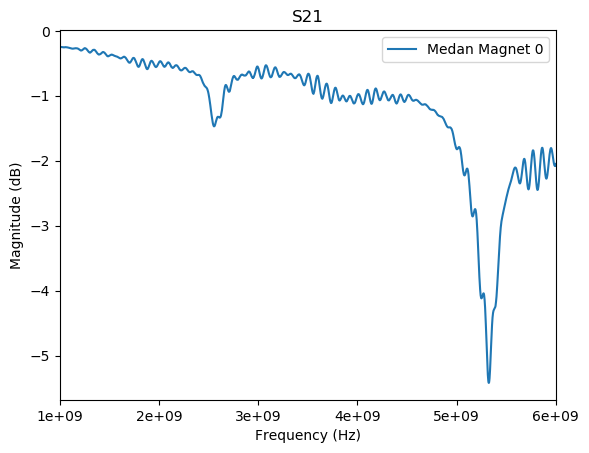

In [7]:
read = rf.Network(res[0])
read_sym = rf.Network(r'D:\itebe\FISIKA\Thesis, moga cepet lulus aamiin\Pengukuran\20230120\gabung\b (51).s2p')
read_sym.plot_s_db(m=1, n=0, label='Medan Magnet 0')
                   #, label='Symmetric'
#read.plot_s_db(m=1, n=0, label='Asymmetric')
plt.title('S21')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

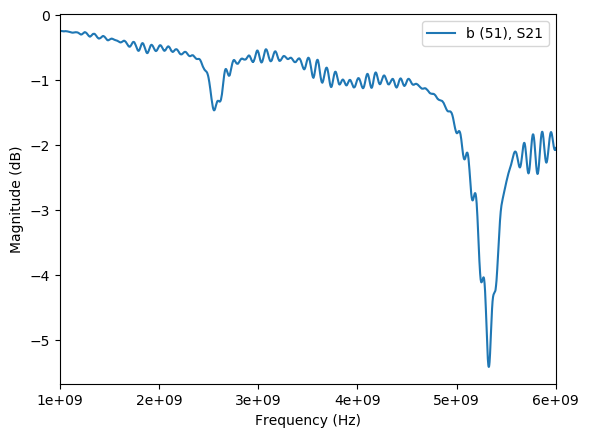

In [11]:
rf.time.find_n_peaks(read_sym.plot_s_db(m=1, n=0), 1, thres=0.9)